selective search(ss)算法用于提取候选框，在rcnn结构中有应用。ss算法于2012年提出，其基本原理是先将图像进行分割，分割成若干小碎片，然后基于多样性的相似度（包含颜色、纹理等）进行聚合，直到所有碎片聚为一整张图片。中间过程得以保留，得到最终输出的结果。

A selective search al-gorithm is subject to the following design considerations：<br/>
Capture All Scales. Objects can occur at any scale within the im-age. Furthermore, some objects have less clear boundariesthen other objects. Therefore, in selective search all objectscales have to be taken into account, as illustrated in Figure2. This is most naturally achieved by using an hierarchicalalgorithm<br/>
Diversiﬁcation. There is no single optimal strategy to group re-gions together. As observed earlier in Figure 1, regions mayform an object because of only colour, only texture, or becauseparts are enclosed. Furthermore, lighting conditions such asshading and the colour of the light may inﬂuence how regionsform an object. Therefore instead of a single strategy whichworks well in most cases, we want to have a diverse set ofstrategies to deal with all cases<br/>
Fast to Compute. The goal of selective search is to yield a set ofpossible object locations for use in a practical object recogni-tion framework. The creation of this set should not become acomputational bottleneck, hence our algorithm should be rea-sonably fast.

Selective Search by Hierarchical Grouping:The general method is detailed in Algorithm1.
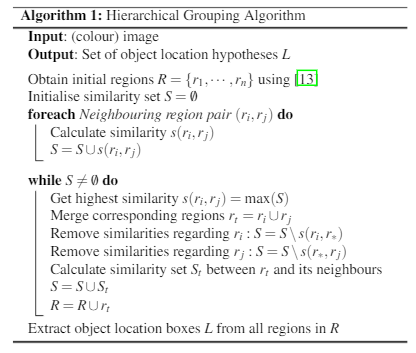

Diversiﬁcation Strategies:<br/>
Complementary Similarity Measures:<br/>
$s_{color}(r_i, r_j)$: measures colour similarity. Speciﬁcally, for each region we obtain one-dimensional colour histograms for each colour channel using 25 bins, which we found to work well.This leads to a colour histogram $C_i={c_i^1,...,c_i^n}$for each region  $r_i$ with dimensionality n=75 when three colour channels are used. The colour histograms are normalised using the L1 norm. Similarity is measured using the histogram intersection:
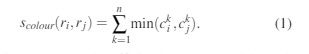

The colour histograms can be efﬁciently propagated throughthe hierarchy by:
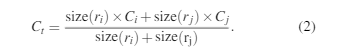
The size of a resulting region is simply the sum of its con-stituents: $size(r_t) = size(r_i) + size(r_j)$

$s_{texture}(r_i, r_j)$:measures texture similarity. We represent texture us-ing fast SIFT-like measurements as SIFT itself works well formaterial recognition. We take Gaussian derivatives in eight orientations using$\delta=1$ for each colour channel. For each orientation for each colour channel we extract a histogram using a bin size of 10. This leads to a texture histogram $T_i={t_i^1,...,t_i^n}$for each region $r_i$ with dimensionality n=240 when three colour channels are used. Texture histograms are normalised using the L1 norm. Similarity is measured using histogram intersection:
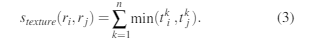

$s_{size}(r_i, r_j)$: encourages small regions to merge early. This forces regions in S,i.e. regions which have not yet been merged, to be of similar sizes throughout the algorithm. This is desirable because it ensures that object locations at all scales are created at all parts of the image. For example, it prevents a single region from gobbling up all other regions one by one,yielding all scales only at the location of this growing regionand nowhere else. $s_{size}(r_i,r_j)$is deﬁned as the fraction of the image that $r_i$ and $r_j$ jointly occupy:
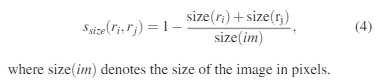

$s_{fill}(r_i, r_j)$:measures how well region $r_i$ and $r_j$ ﬁt into each other.The idea is to ﬁll gaps: if $r_i$ is contained in $r_j$ it is logical to merge these ﬁrst in order to avoid any holes. On the other hand, if $r_i$ and $r_j$ are hardly touching each other they will likely form a strange region and should not be merged. To keep the measure fast, we use only the size of the regions and of the containing boxes. Speciﬁcally, we deﬁne $BB_{ij}$ to be the tight bounding box around $r_i$ and $r_j$. Now $s_{ﬁll}(r_i,r_j)$ is the fraction of the image contained in $BB_{ij}$ which is not covered by the regions of $r_i$ and $r_j$:
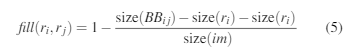

In this paper, our ﬁnal similarity measure is a combination of the above four:
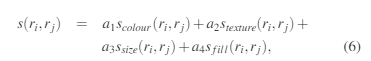
where $a_i \in {0,1}$denotes if the similarity measure is used or not. 

Combining Locations:是指对产生的候选框进行排序（ranking），最有希望包含物体的框排在前面，这样我们可以根据需要挑选前n个框。排序规则是最终聚合成的整幅图像权重为1，依次往前，分别加1.<br/>
However, as we combine results from up to 80 different strategies, such order would too heavily emphasize large regions. To prevent this, we include some randomness as follows. Given a grouping strategy $j$, let $r_i^j$ be the region which is created at position $i$ in the hierarchy, where $i=1$ represents the top of the hierarchy (whose corresponding region covers the complete image). We now calculate the position value $v_i^j$ as $RND * i$,where $RND$ is a random number in range [0,1]. The ﬁnal ranking is obtained by ordering the regions using $v_i^j$